In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

# 1. 数据的基础分析

主要目的：初步理解数据；观察有没有缺失的数据；不同feature之间的分布

## 1.1  Read data

In [136]:
df_beauty_train = pd.read_csv('./data/beauty_data_info_train_competition.csv')
df_beauty_val = pd.read_csv('./data/beauty_data_info_val_competition.csv')
df_fashion_train = pd.read_csv('./data/fashion_data_info_train_competition.csv')
df_beauty_val = pd.read_csv('./data/fashion_data_info_val_competition.csv')
df_mobile_train = pd.read_csv('./data/mobile_data_info_train_competition.csv')
df_mobile_val = pd.read_csv('./data/mobile_data_info_train_competition.csv')


## 1. 2 Understand Beauty Data

In [6]:
df_beauty_train

,itemid,title,image_path,Colour_group,Brand,Benefits,Product_texture,Skin_type
0,307504,nyx sex bomb pallete natural palette,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,1.0,157.0,NaN,NaN,NaN
1,461203,etude house precious mineral any cushion pearl...,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,NaN,73.0,11.0,7.0,NaN
2,3592295,milani rose powder blush,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,NaN,393.0,20.0,6.0,NaN
3,4460167,etude house baby sweet sugar powder,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg,NaN,73.0,NaN,6.0,NaN
4,5853995,bedak revlon color stay aqua mineral make up,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg,3.0,47.0,NaN,6.0,NaN
5,6208490,dr pure whitening cream,beauty_image/77e6b7e9d5544adbfda6809b2351c4fa.jpg,6.0,215.0,NaN,8.0,NaN
6,6959546,chanel powder blush malice,beauty_image/485c4b8435a1e94976a569f3f014ea8b.jpg,NaN,212.0,NaN,6.0,NaN
7,8984461,snail white cream original 100,beauty_image/c7336f1c2e590d4c2bee219a6a0351a7.jpg,NaN,NaN,22.0,8.0,0.0
8,9184082,sunprise all proof spf 50,beauty_image/970b32aa659689f371516e5ceb423e25.jpg,6.0,NaN,NaN,NaN,NaN
9,10345338,eyebrow powder nyx satuan rp 15.000 pc,beauty_image/49a47745248031775c98593f70f7201a.jpg,NaN,157.0,NaN,6.0,NaN


In [37]:
### Find out how many NaN data are there

beauty_identity_columns = ['itemid', 'image_path']

for column in df_beauty_train[beauty_identity_columns]:
    print ("For the column:", column)
    print ("Whether there are null value:", df_beauty_train[column].isna().sum()) # use isna().sum() to count total nan value
    print ("The percentage of NaN values are: ", df_beauty_train[column].isna().sum()/286582)
    print ("-------------------------------------")

For the column: itemid
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------
For the column: image_path
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------


In [95]:
### Find out how many NaN data are there

beauty_feature_columns = ['title', 'Colour_group', 'Brand', 'Benefits', 'Product_texture', 'Skin_type']

for column in df_beauty_train[beauty_feature_columns]:
    print ("For the column:", column)
    print ("Whether there are null value:", df_beauty_train[column].isna().sum()) # use isna().sum() to count total nan value
    print ("The percentage of NaN values are: ", df_beauty_train[column].isna().sum()/286582)
    print ("-------------------------------------")

For the column: title
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------
For the column: Colour_group
Whether there are null value: 173027
The percentage of NaN values are:  0.6037608782128675
-------------------------------------
For the column: Brand
Whether there are null value: 48455
The percentage of NaN values are:  0.16907900705557222
-------------------------------------
For the column: Benefits
Whether there are null value: 165259
The percentage of NaN values are:  0.5766551981631785
-------------------------------------
For the column: Product_texture
Whether there are null value: 42288
The percentage of NaN values are:  0.14755986070304486
-------------------------------------
For the column: Skin_type
Whether there are null value: 228173
The percentage of NaN values are:  0.7961874786274086
-------------------------------------


Conclusion: Add the indentity columns have no NaN value, but lots of the feature columns have NaN value

In [39]:
### To Add on a column with NaN count to count overall NaN value for each item

df_beauty_train['nan_count'] = df_beauty_train.apply(lambda x: x.isnull().sum(), axis=1)

In [49]:
# Drop item_id as we dont need them for model 

df_beauty_train.drop(['itemid'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf98be0>,
      dtype=object)

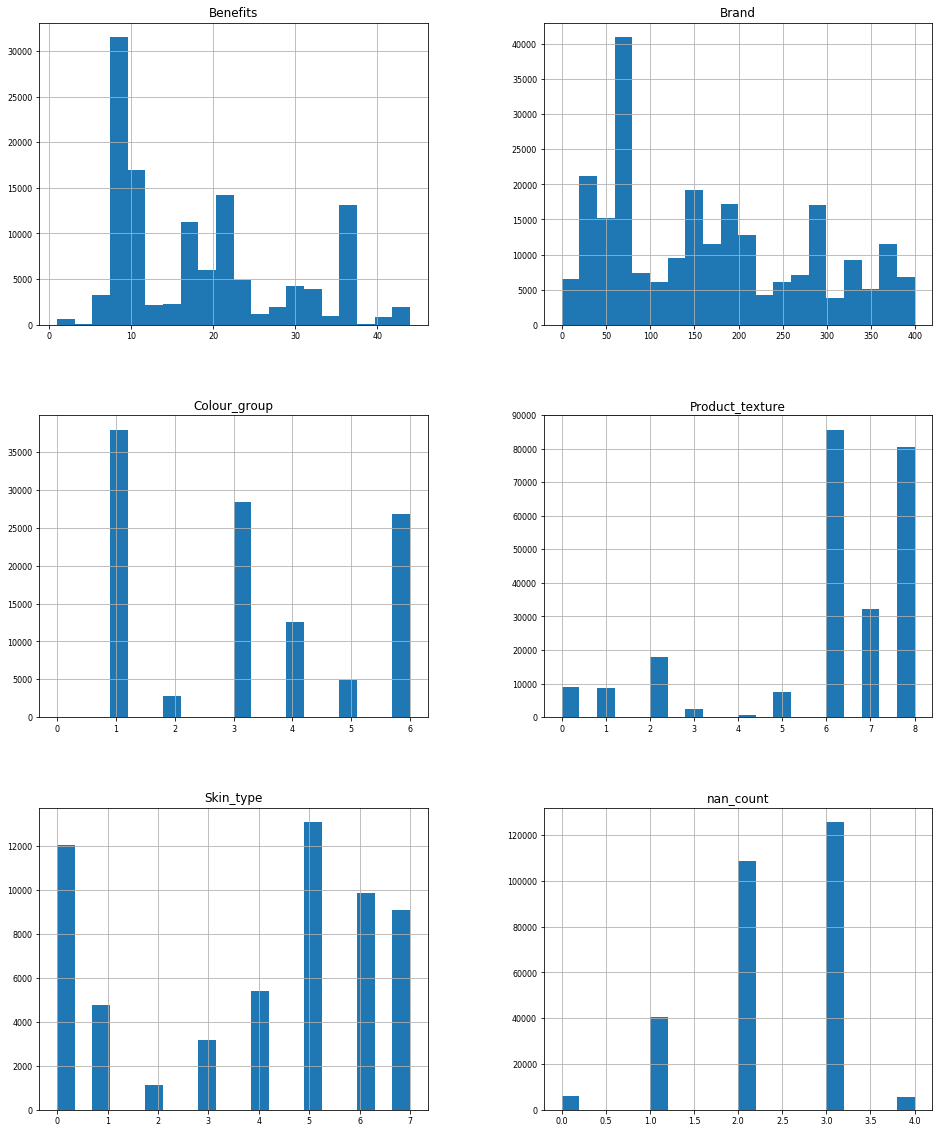

In [50]:
### Plot the distribution of all features

df_beauty_train.hist(figsize = (16,20), bins = 20, xlabelsize=8, ylabelsize=8)

## 1. 3 Understand Fashion Data

In [51]:
df_fashion_train

,itemid,title,Pattern,Collar Type,Sleeves,Fashion Trend,Clothing Material,image_path
0,2282553,retro floral dress,2.0,NaN,NaN,3.0,NaN,fashion_image/78d17fdb159bba51a4250dc3d583245e
1,13822218,dress floral sifon,2.0,NaN,NaN,NaN,4.0,fashion_image/2f77dac9965bbfdb03cbd3724b3552c5
2,33555935,korean white chiffon collar dress,NaN,13.0,NaN,10.0,4.0,fashion_image/6dbe2e7cba5ddbb750d2144d8f248f11
3,65755120,women s trendy apricot o neck solid chiffon bl...,NaN,3.0,NaN,NaN,4.0,fashion_image/dc9b21429604148fc0342d12694f3294
4,65857438,big sale baju gamis pesta india aysilla pancar...,NaN,NaN,NaN,6.0,17.0,fashion_image/6c25c578dd8edce742a805f891f1a51f
5,69593037,bayar di tempat bodycon dress tanpa lengan den...,NaN,NaN,0.0,NaN,3.0,fashion_image/17d11c0e9d7f915dc8ca9b443a336701
6,79488636,gaun mini pesta malam patchwork tanpa punggung...,5.0,8.0,3.0,6.0,NaN,fashion_image/e25977681e7ebfa815efef8087ea8fd7
7,81622997,gaun pesta kasual wanita bergaya tanpa lengan ...,1.0,3.0,0.0,6.0,7.0,fashion_image/492f80d9bdfd1e412aab0873cf172cec
8,81743165,gaun mini diatas lutut wanita bergaya leher o ...,NaN,3.0,2.0,NaN,7.0,fashion_image/d74f56b21601a41710d72f887d6439b4
9,82512933,gaun pesta cardi velvet emboss payet,NaN,NaN,NaN,6.0,2.0,fashion_image/ee05d8051e800cc4845b5cbfae86474e


In [69]:
### Find out how many NaN data are there

fashion_identity_columns = ['itemid', 'image_path']

for column in df_fashion_train[fashion_identity_columns]:
    print ("For the column:", column)
    print ("Whether there are null value:", df_fashion_train[column].isna().sum()) # use isna().sum() to count total nan value
    print ("The percentage of NaN values are: ", df_fashion_train[column].isna().sum()/219702)
    print ("-------------------------------------")

For the column: itemid
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------
For the column: image_path
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------


In [66]:

fashion_feature_columns = ['title', 'Collar Type', 'Sleeves', 'Pattern', 'Fashion Trend', 'Clothing Material']

for column in df_fashion_train[fashion_feature_columns]:
    print ("For the column:", column)
    print ("Whether there are null value:", df_fashion_train[column].isna().sum()) # use isna().sum() to count total nan value
    print ("The percentage of NaN values are: ", df_fashion_train[column].isna().sum()/219702)
    print ("-------------------------------------")

For the column: title
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------
For the column: Collar Type
Whether there are null value: 129626
The percentage of NaN values are:  0.5900082839482572
-------------------------------------
For the column: Sleeves
Whether there are null value: 81157
The percentage of NaN values are:  0.3693958179716161
-------------------------------------
For the column: Pattern
Whether there are null value: 90160
The percentage of NaN values are:  0.4103740521251513
-------------------------------------
For the column: Fashion Trend
Whether there are null value: 95771
The percentage of NaN values are:  0.4359131915048566
-------------------------------------
For the column: Clothing Material
Whether there are null value: 79481
The percentage of NaN values are:  0.3617673029831317
-------------------------------------


In [58]:
### To Add on a column with NaN count to count overall NaN value for each item

df_fashion_train['nan_count'] = df_fashion_train.apply(lambda x: x.isnull().sum(), axis=1)

In [60]:
# Drop item_id as we dont need them for model 
df_fashion_train.drop(['itemid'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c475358>,
      dtype=object)

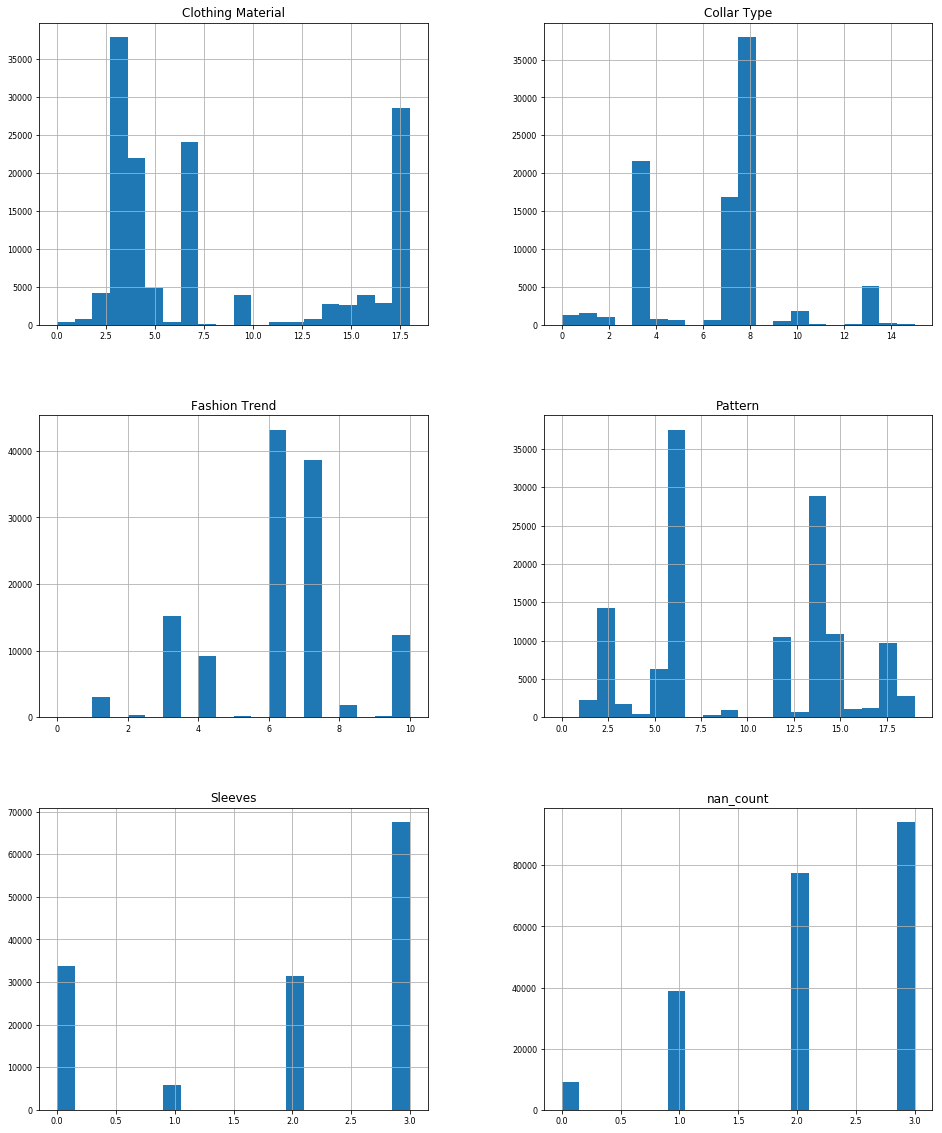

In [61]:
### Plot the distribution of all features

df_fashion_train.hist(figsize = (16,20), bins = 20, xlabelsize=8, ylabelsize=8)

## 1.4 Understand Mobile Data

In [62]:
df_mobile_train

,itemid,title,image_path,Operating System,Features,Network Connections,Memory RAM,Brand,Warranty Period,Storage Capacity,Color Family,Phone Model,Camera,Phone Screen Size
0,2346660,apple iphone 4s back glass spare part original...,mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg,NaN,NaN,NaN,NaN,2.0,NaN,NaN,12.0,1526.0,NaN,NaN
1,2816338,iphone 4s 64gb white,mobile_image/3b9a11608551b11b9330268e0d055e01.jpg,NaN,NaN,NaN,NaN,2.0,NaN,3.0,12.0,NaN,NaN,NaN
2,2847602,samsung sm b310e piton dual sim,mobile_image/1d719e936841a83c165da620f927de68.jpg,NaN,NaN,NaN,NaN,43.0,13.0,NaN,12.0,NaN,NaN,NaN
3,3116949,samsung caramel gt e1272 dual sim 32 mb putih,mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg,NaN,NaN,NaN,NaN,43.0,13.0,NaN,12.0,NaN,NaN,NaN
4,3794648,garskin sony experia z z1 z2 ultra,mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg,6.0,NaN,0.0,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN
5,4980072,lcd xiaomi redmi 4+touchscreen,mobile_image/504bbab21ede157e6e3f1b93e6b6484c.jpg,NaN,0.0,NaN,NaN,33.0,NaN,NaN,NaN,376.0,NaN,NaN
6,5769008,samsung caramel gt e1272 dual sim 32mb black,mobile_image/e088ca5ebb1ab5ba90a8cff8f9c4f791.jpg,NaN,NaN,NaN,NaN,43.0,13.0,NaN,10.0,NaN,NaN,NaN
7,9503620,iphone 4g 8gb,mobile_image/a23f0381039e5595559be27db3271d2f.jpg,NaN,NaN,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,17937158,blackberry torch 1 9800 gsm garansi distributo...,mobile_image/7803e0e63b5972e14b6ff564679f941c.jpg,NaN,0.0,NaN,NaN,51.0,2.0,NaN,12.0,NaN,NaN,NaN
9,21715801,samsung keystone 3 sm b109e,mobile_image/a5360d928a586de4b7dc5a8463f9fc26.jpg,NaN,NaN,1.0,NaN,43.0,NaN,NaN,NaN,559.0,NaN,NaN


In [63]:
df_mobile_train.columns

Index(['itemid', 'title', 'image_path', 'Operating System', 'Features',
       'Network Connections', 'Memory RAM', 'Brand', 'Warranty Period',
       'Storage Capacity', 'Color Family', 'Phone Model', 'Camera',
       'Phone Screen Size'],
      dtype='object')

In [64]:
### Find out how many NaN data are there

mobile_identity_columns = ['itemid', 'image_path']

for column in df_mobile_train[mobile_identity_columns]:
    print ("For the column:", column)
    print ("Whether there are null value:", df_mobile_train[column].isna().sum()) # use isna().sum() to count total nan value
    print ("The percentage of NaN values are: ", df_mobile_train[column].isna().sum()/160330)
    print ("-------------------------------------")

For the column: itemid
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------
For the column: image_path
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------


In [70]:
mobile_feature_columns = ['title','Operating System', 'Features',
       'Network Connections', 'Memory RAM', 'Brand', 'Warranty Period',
       'Storage Capacity', 'Color Family', 'Phone Model', 'Camera',
       'Phone Screen Size']

for column in df_mobile_train[mobile_feature_columns]:
    print ("For the column:", column)
    print ("Whether there are null value:", df_mobile_train[column].isna().sum()) # use isna().sum() to count total nan value
    print ("The percentage of NaN values are: ", df_mobile_train[column].isna().sum()/160330)
    print ("-------------------------------------")

For the column: title
Whether there are null value: 0
The percentage of NaN values are:  0.0
-------------------------------------
For the column: Operating System
Whether there are null value: 115052
The percentage of NaN values are:  0.717594960394187
-------------------------------------
For the column: Features
Whether there are null value: 120985
The percentage of NaN values are:  0.7545998877315536
-------------------------------------
For the column: Network Connections
Whether there are null value: 136906
The percentage of NaN values are:  0.8539013285099483
-------------------------------------
For the column: Memory RAM
Whether there are null value: 103293
The percentage of NaN values are:  0.6442524792615231
-------------------------------------
For the column: Brand
Whether there are null value: 5292
The percentage of NaN values are:  0.03300692322085698
-------------------------------------
For the column: Warranty Period
Whether there are null value: 112257
The percentage

In [71]:
### To Add on a column with NaN count to count overall NaN value for each item

df_mobile_train['nan_count'] = df_mobile_train.apply(lambda x: x.isnull().sum(), axis=1)

In [72]:
# Drop item_id as we dont need them for model 
df_mobile_train.drop(['itemid'], axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1124d1f60>,
      dtype=object)

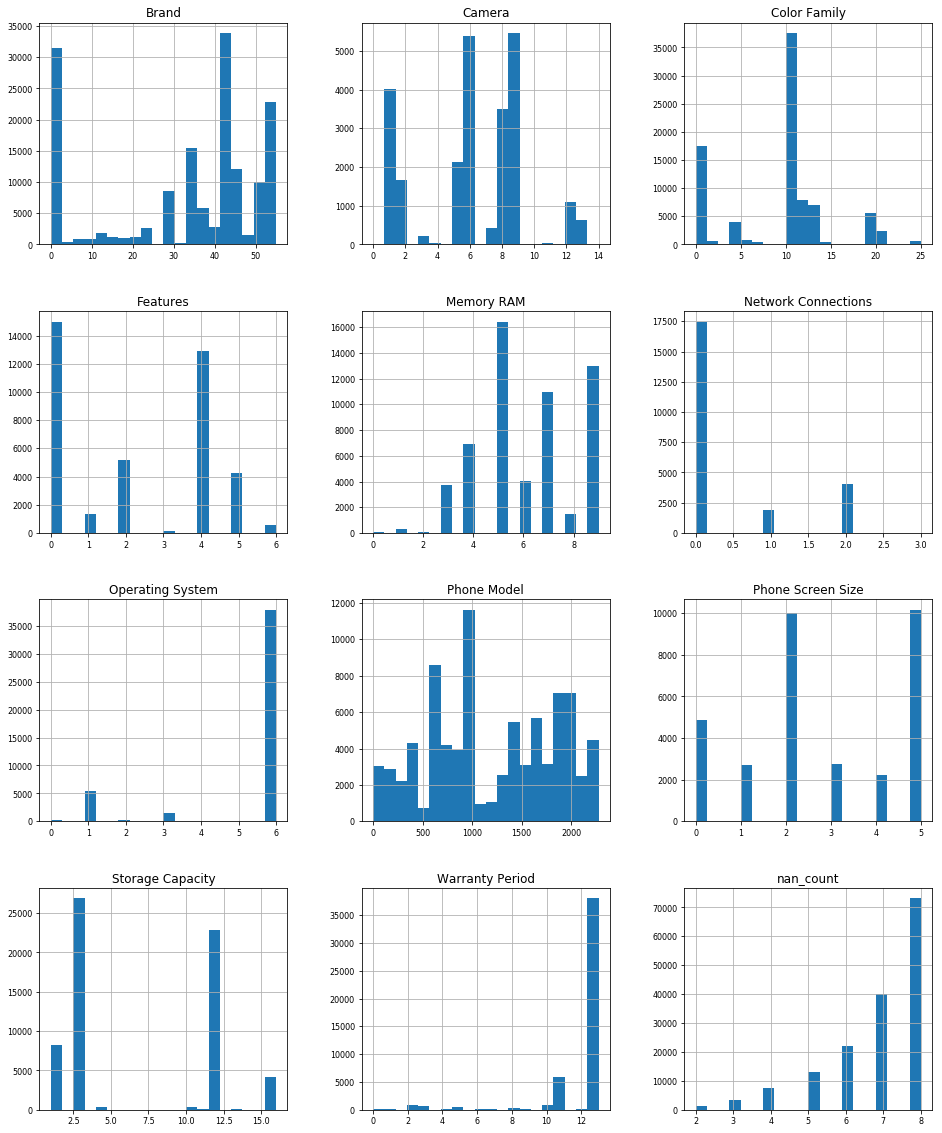

In [73]:
### Plot the distribution of all features

df_mobile_train.hist(figsize = (16,20), bins = 20, xlabelsize=8, ylabelsize=8)

# 2. Data Mapping (From numerics to value) for easy understanding
主要目的：因为在原数据中，所有的feature都是以数字形式表达的，不利于我们的分析，所以本版块将数字信息转化为json file中的text信息以便于理解和阅读

In [78]:
### Open the json file

with open('./data/beauty_profile_train.json') as f:
    beauty_json = json.load(f)
with open('./data/fashion_profile_train.json') as f:
    fashion_json = json.load(f)
with open('./data/mobile_profile_train.json') as f:
    mobile_json = json.load(f)

In [118]:
# For beauty
beauty_feature_columns = ['Colour_group', 'Brand', 'Benefits', 'Product_texture', 'Skin_type'] # title should not included
beauty_column_map = {}
for column in beauty_feature_columns:
    beauty_column_map[column] = {v:k for k,v in beauty_json[column].items()}
    
fashion_feature_columns = ['Collar Type', 'Sleeves', 'Pattern', 'Fashion Trend', 'Clothing Material'] # title should not included
fashion_column_map = {}
for column in fashion_feature_columns:
    fashion_column_map[column] = {v:k for k,v in fashion_json[column].items()}

mobile_feature_columns = ['Operating System', 'Features',
       'Network Connections', 'Memory RAM', 'Brand', 'Warranty Period',
       'Storage Capacity', 'Color Family', 'Phone Model', 'Camera',
       'Phone Screen Size'] # title should not included
mobile_column_map = {}
for column in mobile_feature_columns:
    mobile_column_map[column] = {v:k for k,v in mobile_json[column].items()}

In [125]:
# Substitute the numeric with the actual description in the json to form text dataframe
# Please note: If json does not contain the info, the substitution result will be NaN
# Therefore, replace the original NaN value with 'Unknown'
df_beauty_train = df_beauty_train.replace(np.nan, 'Unknown', regex = True)
df_beauty_train_text = df_beauty_train.copy()
for column in beauty_feature_columns:
    df_beauty_train_text.loc[:, column] = df_beauty_train_text[column].map(beauty_column_map[column])

In [126]:
df_beauty_train_text

,itemid,title,image_path,Colour_group,Brand,Benefits,Product_texture,Skin_type
0,307504,nyx sex bomb pallete natural palette,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,1 warna,nyx,NaN,NaN,NaN
1,461203,etude house precious mineral any cushion pearl...,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,NaN,etude house,NaN,cushion,NaN
2,3592295,milani rose powder blush,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,NaN,milani,NaN,solid powder,NaN
3,4460167,etude house baby sweet sugar powder,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg,NaN,etude house,NaN,solid powder,NaN
4,5853995,bedak revlon color stay aqua mineral make up,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg,emas,revlon,NaN,solid powder,NaN
5,6208490,dr pure whitening cream,beauty_image/77e6b7e9d5544adbfda6809b2351c4fa.jpg,8 color,dr pure,NaN,cream,NaN
6,6959546,chanel powder blush malice,beauty_image/485c4b8435a1e94976a569f3f014ea8b.jpg,NaN,chanel,NaN,solid powder,NaN
7,8984461,snail white cream original 100,beauty_image/c7336f1c2e590d4c2bee219a6a0351a7.jpg,NaN,NaN,NaN,cream,dry
8,9184082,sunprise all proof spf 50,beauty_image/970b32aa659689f371516e5ceb423e25.jpg,8 color,NaN,NaN,NaN,NaN
9,10345338,eyebrow powder nyx satuan rp 15.000 pc,beauty_image/49a47745248031775c98593f70f7201a.jpg,NaN,nyx,NaN,solid powder,NaN


In [127]:
df_fashion_train_text = df_fashion_train.copy()
for column in fashion_feature_columns:
    df_fashion_train_text.loc[:, column] = df_fashion_train_text[column].map(fashion_column_map[column])

In [128]:
df_fashion_train_text

,itemid,title,Pattern,Collar Type,Sleeves,Fashion Trend,Clothing Material,image_path
0,2282553,retro floral dress,floral,NaN,NaN,retro vintage,NaN,fashion_image/78d17fdb159bba51a4250dc3d583245e
1,13822218,dress floral sifon,floral,NaN,NaN,NaN,chiffon,fashion_image/2f77dac9965bbfdb03cbd3724b3552c5
2,33555935,korean white chiffon collar dress,NaN,polo,NaN,korean,chiffon,fashion_image/6dbe2e7cba5ddbb750d2144d8f248f11
3,65755120,women s trendy apricot o neck solid chiffon bl...,NaN,o neck,NaN,NaN,chiffon,fashion_image/dc9b21429604148fc0342d12694f3294
4,65857438,big sale baju gamis pesta india aysilla pancar...,NaN,NaN,NaN,party,jersey,fashion_image/6c25c578dd8edce742a805f891f1a51f
5,69593037,bayar di tempat bodycon dress tanpa lengan den...,NaN,NaN,sleeveless,NaN,lace,fashion_image/17d11c0e9d7f915dc8ca9b443a336701
6,79488636,gaun mini pesta malam patchwork tanpa punggung...,patchwork,v neck,long sleeve,party,NaN,fashion_image/e25977681e7ebfa815efef8087ea8fd7
7,81622997,gaun pesta kasual wanita bergaya tanpa lengan ...,plaid,o neck,sleeveless,party,polyester,fashion_image/492f80d9bdfd1e412aab0873cf172cec
8,81743165,gaun mini diatas lutut wanita bergaya leher o ...,NaN,o neck,short sleeve,NaN,polyester,fashion_image/d74f56b21601a41710d72f887d6439b4
9,82512933,gaun pesta cardi velvet emboss payet,NaN,NaN,NaN,party,velvet,fashion_image/ee05d8051e800cc4845b5cbfae86474e


In [129]:
df_mobile_train_text = df_mobile_train.copy()
for column in mobile_feature_columns:
    df_mobile_train_text.loc[:, column] = df_mobile_train_text[column].map(mobile_column_map[column])

In [130]:
df_mobile_train_text

,itemid,title,image_path,Operating System,Features,Network Connections,Memory RAM,Brand,Warranty Period,Storage Capacity,Color Family,Phone Model,Camera,Phone Screen Size
0,2346660,apple iphone 4s back glass spare part original...,mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg,NaN,NaN,NaN,NaN,apple,NaN,NaN,white,apple iphone 4s,NaN,NaN
1,2816338,iphone 4s 64gb white,mobile_image/3b9a11608551b11b9330268e0d055e01.jpg,NaN,NaN,NaN,NaN,apple,NaN,64gb,white,NaN,NaN,NaN
2,2847602,samsung sm b310e piton dual sim,mobile_image/1d719e936841a83c165da620f927de68.jpg,NaN,NaN,NaN,NaN,samsung,1 year,NaN,white,NaN,NaN,NaN
3,3116949,samsung caramel gt e1272 dual sim 32 mb putih,mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg,NaN,NaN,NaN,NaN,samsung,1 year,NaN,white,NaN,NaN,NaN
4,3794648,garskin sony experia z z1 z2 ultra,mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg,android,NaN,4g,NaN,sony,NaN,NaN,NaN,NaN,NaN,NaN
5,4980072,lcd xiaomi redmi 4+touchscreen,mobile_image/504bbab21ede157e6e3f1b93e6b6484c.jpg,NaN,touchscreen,NaN,NaN,xiaomi,NaN,NaN,NaN,xiaomi redmi,NaN,NaN
6,5769008,samsung caramel gt e1272 dual sim 32mb black,mobile_image/e088ca5ebb1ab5ba90a8cff8f9c4f791.jpg,NaN,NaN,NaN,NaN,samsung,1 year,NaN,black,NaN,NaN,NaN
7,9503620,iphone 4g 8gb,mobile_image/a23f0381039e5595559be27db3271d2f.jpg,NaN,NaN,4g,8gb,apple,NaN,NaN,NaN,NaN,NaN,NaN
8,17937158,blackberry torch 1 9800 gsm garansi distributo...,mobile_image/7803e0e63b5972e14b6ff564679f941c.jpg,NaN,touchscreen,NaN,NaN,blackberry,2 years,NaN,white,NaN,NaN,NaN
9,21715801,samsung keystone 3 sm b109e,mobile_image/a5360d928a586de4b7dc5a8463f9fc26.jpg,NaN,NaN,2g,NaN,samsung,NaN,NaN,NaN,samsung keystone 3,NaN,NaN


# 3. Correlation Analysis
主要目的：对原数据进行分析，看其中有哪些feature是存在强关联的

In [137]:
df_beauty_feature = df_beauty_train[beauty_feature_columns]

In [141]:
df_beauty_feature.corr()

,Colour_group,Brand,Benefits,Product_texture,Skin_type
Colour_group,1.000000,-0.016517,-0.043088,0.168971,0.111262
Brand,-0.016517,1.000000,-0.042526,-0.014307,-0.129594
Benefits,-0.043088,-0.042526,1.000000,0.005080,0.091717
Product_texture,0.168971,-0.014307,0.005080,1.000000,0.246321
Skin_type,0.111262,-0.129594,0.091717,0.246321,1.000000


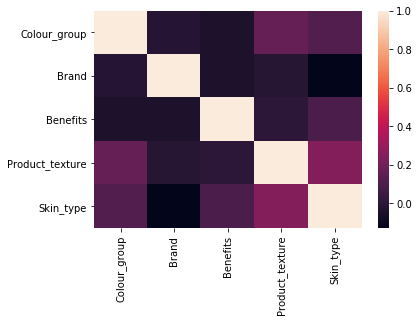

In [140]:
corr = df_beauty_feature.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [142]:
df_fashion_feature = df_fashion_train[fashion_feature_columns]

In [144]:
df_fashion_feature.corr()

,Collar Type,Sleeves,Pattern,Fashion Trend,Clothing Material
Collar Type,1.000000,-0.014920,-0.050513,-0.014979,0.000879
Sleeves,-0.014920,1.000000,-0.028013,-0.026053,0.070907
Pattern,-0.050513,-0.028013,1.000000,0.060419,-0.014778
Fashion Trend,-0.014979,-0.026053,0.060419,1.000000,-0.070136
Clothing Material,0.000879,0.070907,-0.014778,-0.070136,1.000000


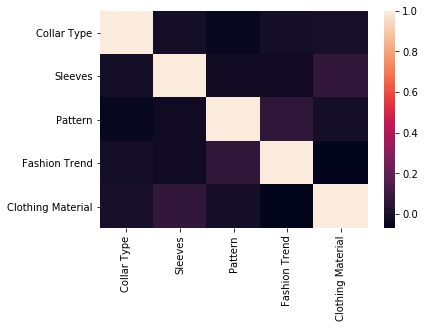

In [145]:
corr = df_fashion_feature.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [147]:
df_mobile_feature = df_mobile_train[mobile_feature_columns]

In [148]:
df_mobile_feature.corr()

,Operating System,Features,Network Connections,Memory RAM,Brand,Warranty Period,Storage Capacity,Color Family,Phone Model,Camera,Phone Screen Size
Operating System,1.000000,-0.065168,0.037144,-0.267543,0.593527,0.098820,0.035050,-0.084428,0.162992,0.093519,0.141736
Features,-0.065168,1.000000,-0.076458,0.053283,-0.084757,-0.055418,0.063132,0.023567,0.087828,0.178813,-0.014616
Network Connections,0.037144,-0.076458,1.000000,-0.132143,-0.007549,-0.072348,-0.048728,0.127198,-0.099921,-0.073263,-0.114976
Memory RAM,-0.267543,0.053283,-0.132143,1.000000,-0.333978,0.039044,0.319560,-0.069298,-0.010100,0.054438,0.075135
Brand,0.593527,-0.084757,-0.007549,-0.333978,1.000000,-0.043340,0.012118,-0.046236,0.245647,0.212675,0.098808
Warranty Period,0.098820,-0.055418,-0.072348,0.039044,-0.043340,1.000000,0.000645,-0.006285,-0.013584,-0.019132,-0.001640
Storage Capacity,0.035050,0.063132,-0.048728,0.319560,0.012118,0.000645,1.000000,-0.004495,-0.100458,0.128992,0.127131
Color Family,-0.084428,0.023567,0.127198,-0.069298,-0.046236,-0.006285,-0.004495,1.000000,-0.036703,0.050389,-0.083879
Phone Model,0.162992,0.087828,-0.099921,-0.010100,0.245647,-0.013584,-0.100458,-0.036703,1.000000,0.032124,-0.077629
Camera,0.093519,0.178813,-0.073263,0.054438,0.212675,-0.019132,0.128992,0.050389,0.032124,1.000000,0.089845


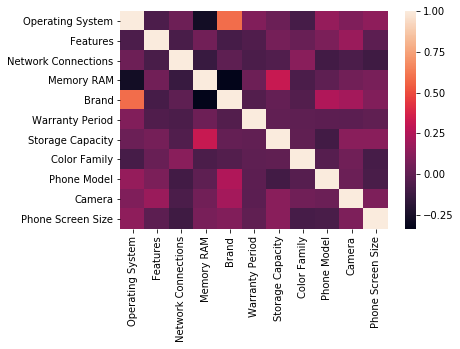

In [156]:
corr = df_mobile_feature.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
